<a href="https://colab.research.google.com/github/BigRo26/Confusion_EEG_Analysis/blob/main/Confusion_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg

In [1]:
!unzip "/content/archive (14).zip"

Archive:  /content/archive (14).zip
  inflating: EEG_data.csv            
  inflating: demographic_info.csv    
  inflating: videos/0.m4v            
  inflating: videos/1.m4v            
  inflating: videos/2.m4v            
  inflating: videos/3.m4v            
  inflating: videos/4.m4v            
  inflating: videos/5.m4v            
  inflating: videos/6.m4v            
  inflating: videos/7.m4v            
  inflating: videos/8.m4v            
  inflating: videos/9.m4v            


In [2]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
eeg_df = pd.read_csv("/content/EEG_data.csv")

In [4]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
eeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [6]:
eeg_df.isnull().sum()

,0
SubjectID,0
VideoID,0
Attention,0
Mediation,0
Raw,0
Delta,0
Theta,0
Alpha1,0
Alpha2,0
Beta1,0


In [7]:
eeg_df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [8]:
eeg_df.rename({"user-definedlabeln": "user-defined-label"}, axis=1, inplace=True)

In [9]:
eeg_df["user-defined-label"].unique()

array([0., 1.])

In [10]:
eeg_df["SubjectID"].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
eeg_df["VideoID"].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [12]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-defined-label
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [74]:
# group raw eeg values for each unique subject and video ID
raw_eeg_dict = eeg_df.groupby(by=["SubjectID", "VideoID", "user-defined-label"])["Raw"].apply(list).to_dict()

In [14]:
len(raw_eeg_dict[(0,0,0)])

144

In [75]:
# create time, eeg reading pairs to visualize eeg signals
multiples = [0.5 * i for i in range(len(raw_eeg_dict[(0,0,0)]))]
raw_eeg_vals = raw_eeg_dict[(0,0,0)]

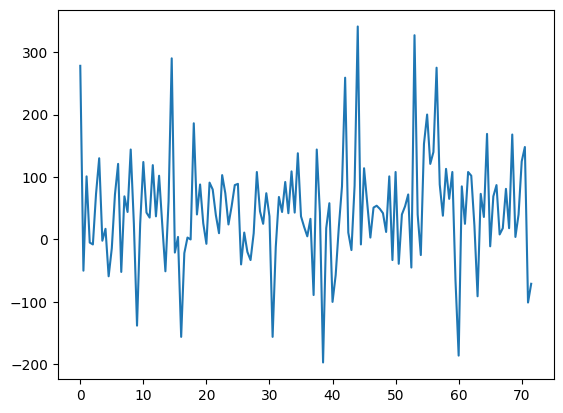

In [76]:
# visualize eeg reading
plt.plot(multiples, raw_eeg_vals)

In [19]:
len(os.listdir("/content/drive/MyDrive/Confusion_EEG_Data/Confused")), len(os.listdir("/content/drive/MyDrive/Confusion_EEG_Data/Not_Confused"))

(51, 49)

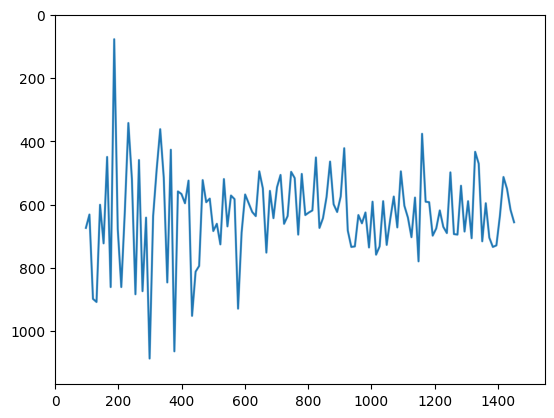

In [20]:
from matplotlib.image import imread

plt.imshow(imread("/content/drive/MyDrive/Confusion_EEG_Data/Not_Confused/0.0_3.0_0.0.png"))

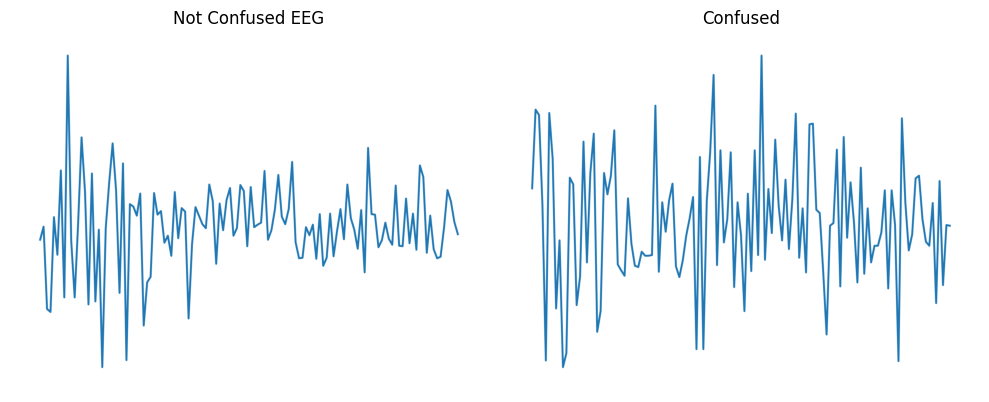

In [77]:
# confused eeg vs non-confused eeg

non_confused_img = plt.imread("/content/drive/MyDrive/Confusion_EEG_Data/Not_Confused/0.0_3.0_0.0.png")
confused_img = plt.imread("/content/drive/MyDrive/Confusion_EEG_Data/Confused/0.0_5.0_1.0.png")

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(non_confused_img)
plt.title("Not Confused EEG")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(confused_img)
plt.title("Confused")
plt.axis('off')

plt.tight_layout()
plt.show()

In [78]:
plt.imread("/content/drive/MyDrive/Confusion_EEG_Data/Confused/0.0_1.0_1.0.png").shape

(1168, 1548, 4)

In [79]:
eeg_dict = eeg_df.groupby(by=["SubjectID", "VideoID"])["Delta"].apply(list).to_dict()

In [80]:
# store class labels for each record
def get_classes():
  classes = []
  class_dict = eeg_df.groupby(by=["SubjectID", "VideoID"])["user-defined-label"].apply(list).to_dict()
  for key in class_dict.keys():
    classes.append(class_dict[key][0])
  return classes

In [81]:
# function to extract summary statistics from each feature
def get_features(feature):
  features = []
  feature_dict = eeg_df.groupby(by=["SubjectID", "VideoID"])[feature].apply(list).to_dict()
  for key in feature_dict.keys():
    arr = np.array(feature_dict[key])
    features.append(round(arr.mean(), 2))
    features.append(round(arr.std(), 2))
    features.append(round(np.median(arr), 2))
    features.append(max(arr))
    features.append(min(arr))
  return features

In [82]:
# extract additional features from raw data
delta_features = get_features("Delta")
theta_features = get_features("Theta")
alpha1_features = get_features("Alpha1")
alpha2_features = get_features("Alpha2")
beta1_features = get_features("Beta1")
beta2_features = get_features("Beta2")
gamma1_features = get_features("Gamma1")
gamma2_features = get_features("Gamma2")

In [83]:
# create new dataset using extracted features

def reshape_features(feature_list):
    return np.array(feature_list).reshape(-1, 5)

delta_reshaped = reshape_features(delta_features)
theta_reshaped = reshape_features(theta_features)
alpha1_reshaped = reshape_features(alpha1_features)
alpha2_reshaped = reshape_features(alpha2_features)
beta1_reshaped = reshape_features(beta1_features)
beta2_reshaped = reshape_features(beta2_features)
gamma1_reshaped = reshape_features(gamma1_features)
gamma2_reshaped = reshape_features(gamma2_features)

all_features = np.hstack((delta_reshaped, theta_reshaped, alpha1_reshaped, alpha2_reshaped, beta1_reshaped, beta2_reshaped, gamma1_reshaped, gamma2_reshaped))

feature_names = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

expanded_feature_names = []
for feature in feature_names:
    expanded_feature_names.extend([f"{feature}_mean", f"{feature}_std", f"{feature}_median", f"{feature}_max", f"{feature}_min"])


features_df = pd.DataFrame(all_features, columns=expanded_feature_names)
features_df['class'] = get_classes()

display(features_df.head())

,Delta_mean,Delta_std,Delta_median,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_median,Theta_max,Theta_min,...,Gamma1_std,Gamma1_median,Gamma1_max,Gamma1_min,Gamma2_mean,Gamma2_std,Gamma2_median,Gamma2_max,Gamma2_min,class
0,544315.10,635040.23,304329.0,2723077.0,2290.0,124965.59,162635.23,81382.5,1031826.0,1945.0,...,37685.32,29328.5,222111.0,1915.0,16817.06,13943.97,13104.5,84108.0,1175.0,0.0
1,739737.29,604253.67,578197.0,3224853.0,15831.0,161064.23,164684.04,109448.0,826317.0,121.0,...,28809.06,29606.5,141042.0,214.0,14519.41,12544.03,10958.5,84001.0,81.0,1.0
2,694078.08,693697.70,463542.0,3958185.0,17735.0,149816.87,165981.49,96455.0,961497.0,4262.0,...,29044.83,27109.0,164217.0,709.0,14545.85,12347.93,10977.5,66255.0,524.0,1.0
3,600823.69,516885.88,471965.5,2581211.0,2205.0,162653.36,259323.72,64971.0,1698512.0,1661.0,...,38322.57,31548.0,227196.0,3562.0,16558.63,16237.17,11812.5,112579.0,1018.0,0.0
4,546628.02,619490.39,301557.0,2757383.0,3256.0,126893.95,180579.59,45817.5,1011493.0,2463.0,...,27963.89,28606.0,181573.0,3623.0,14752.66,10709.32,11745.5,49188.0,947.0,0.0


In [40]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delta_mean     100 non-null    float64
 1   Delta_std      100 non-null    float64
 2   Delta_median   100 non-null    float64
 3   Delta_max      100 non-null    float64
 4   Delta_min      100 non-null    float64
 5   Theta_mean     100 non-null    float64
 6   Theta_std      100 non-null    float64
 7   Theta_median   100 non-null    float64
 8   Theta_max      100 non-null    float64
 9   Theta_min      100 non-null    float64
 10  Alpha1_mean    100 non-null    float64
 11  Alpha1_std     100 non-null    float64
 12  Alpha1_median  100 non-null    float64
 13  Alpha1_max     100 non-null    float64
 14  Alpha1_min     100 non-null    float64
 15  Alpha2_mean    100 non-null    float64
 16  Alpha2_std     100 non-null    float64
 17  Alpha2_median  100 non-null    float64
 18  Alpha2_max 

In [41]:
features_df.describe()

,Delta_mean,Delta_std,Delta_median,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_median,Theta_max,Theta_min,...,Gamma1_std,Gamma1_median,Gamma1_max,Gamma1_min,Gamma2_mean,Gamma2_std,Gamma2_median,Gamma2_max,Gamma2_min,class
count,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.00000,1.000000e+02,100.000000,...,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,6.073833e+05,545308.844400,4.562378e+05,2.683933e+06,13930.580000,168216.366800,203558.283700,97471.48500,1.222291e+06,5190.910000,...,32229.472900,20155.275000,2.061806e+05,1257.490000,14395.114000,15865.817500,10146.405000,1.108392e+05,733.910000,0.510000
std,2.850485e+05,170190.999477,2.836505e+05,7.717053e+05,15488.800388,88796.338068,101197.800618,59898.87074,5.929160e+05,4416.060329,...,53080.406837,34970.254556,3.398561e+05,2516.073847,20015.901083,25420.946626,14244.542375,2.098235e+05,1306.951601,0.502418
min,1.424224e+04,38668.990000,7.193000e+03,3.553820e+05,448.000000,12021.170000,9912.540000,9507.50000,7.389900e+04,17.000000,...,1100.270000,2211.000000,5.860000e+03,1.000000,1771.470000,955.030000,826.500000,6.305000e+03,2.000000,0.000000
25%,4.211034e+05,502294.480000,2.070526e+05,2.356076e+06,1787.750000,111776.117500,137445.452500,52544.25000,8.253602e+05,2097.000000,...,9815.752500,6709.750000,6.153875e+04,328.500000,3908.312500,4828.900000,2693.625000,3.057425e+04,152.000000,0.000000
50%,6.465116e+05,600356.815000,4.684258e+05,2.736900e+06,7976.000000,161182.400000,195148.825000,88958.75000,1.186207e+06,4100.500000,...,17458.610000,9121.000000,1.064610e+05,602.000000,7478.575000,7503.430000,5087.750000,5.117500e+04,385.500000,1.000000
75%,8.449240e+05,657288.930000,6.991216e+05,3.188966e+06,22118.500000,231756.652500,261293.700000,140800.00000,1.643378e+06,6622.500000,...,29084.475000,19010.250000,1.809512e+05,1137.500000,14597.552500,12992.687500,10984.375000,8.402775e+04,801.000000,1.000000
max,1.067592e+06,782968.830000,1.027579e+06,3.964663e+06,61784.000000,401609.450000,476791.520000,266435.50000,3.007802e+06,26739.000000,...,302834.080000,216531.500000,1.972506e+06,16784.000000,97845.970000,144041.240000,67986.500000,1.348117e+06,8604.000000,1.000000


In [84]:
# identify extracted features with highest correlation to target variable

def find_corrs():
  corr_dict = {}

  for col in features_df.columns[:len(features_df.columns)-1]:
    corr = np.corrcoef(features_df[col], features_df["class"])[0, 1]
    corr_dict[col] = corr

  top_keys = sorted(corr_dict, key=corr_dict.get, reverse=True)[:10]
  top_corrs = [corr_dict[k] for k in top_keys]

  plt.figure(figsize=(12, 8))
  plt.title("Top 10 Highest Correlated Features with Class")
  plt.xlabel("Feature")
  plt.ylabel("Correlation")
  plt.bar(top_keys, top_corrs)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

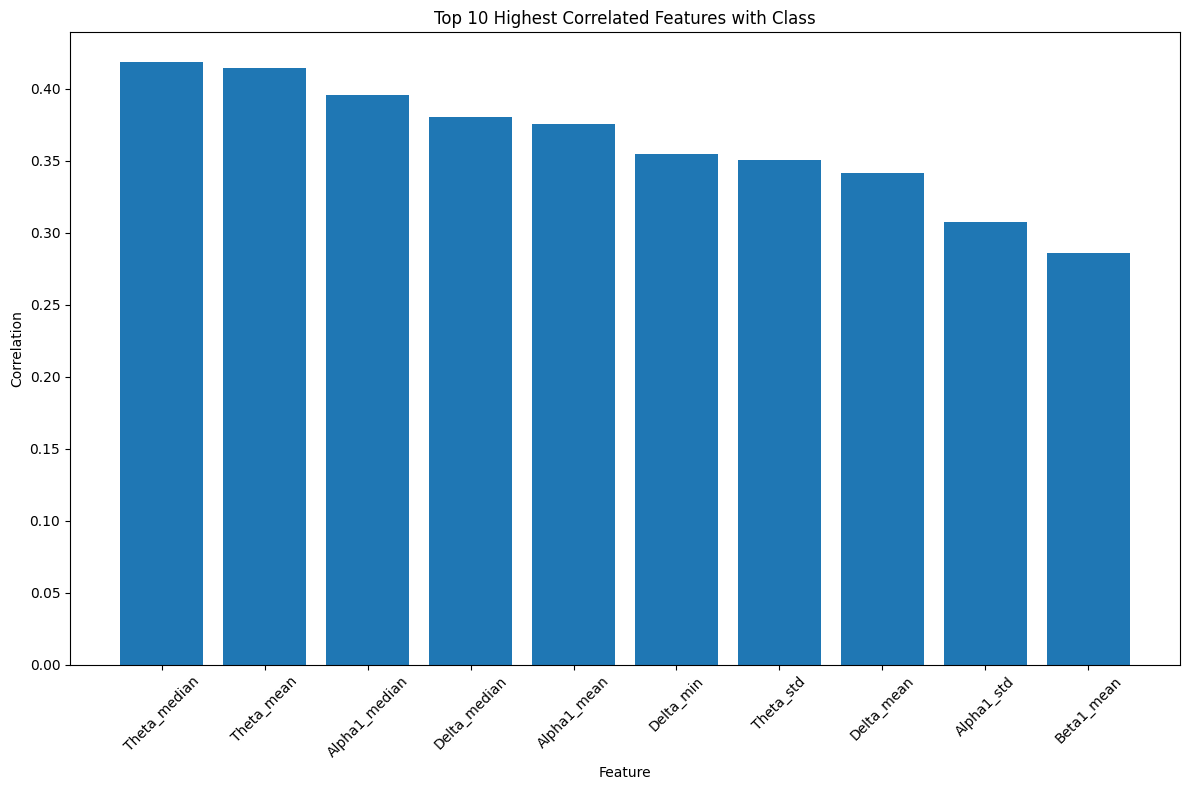

In [85]:
find_corrs()

In [86]:
import plotly.express as px

In [87]:
# visualize distribution of "theta_median" with respect to target variable
px.histogram(
    features_df,
    x = "Theta_median",
    color = "class",
    marginal = "box"
)

In [88]:
# visualize distribution of "beta1_mean" with respect to target variable
px.histogram(
    features_df,
    x = "Beta1_mean",
    color = "class",
    marginal = "box"
)

In [89]:
# install sdv library to generate synthetic tabular data
!pip install sdv

In [90]:
import sdv
sdv.__version__

'1.24.1'

In [91]:
import pandas as pd
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata

# Auto-detect metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=features_df)

# Initialize the synthesizer
synthesizer = TVAESynthesizer(metadata)

# Fit the model
synthesizer.fit(features_df)

# Generate synthetic data (100,000 rows)
synthetic_data = synthesizer.sample(num_rows=100000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:163: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:129: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



In [92]:
synthetic_data.head()

,Delta_mean,Delta_std,Delta_median,Delta_max,Delta_min,Theta_mean,Theta_std,Theta_median,Theta_max,Theta_min,...,Gamma1_std,Gamma1_median,Gamma1_max,Gamma1_min,Gamma2_mean,Gamma2_std,Gamma2_median,Gamma2_max,Gamma2_min,class
0,257565.82,565891.05,341487.1,3003559.0,4075.0,135322.70,248244.59,118661.6,1469821.0,2024.0,...,24605.47,15531.8,83015.0,456.0,11025.20,4076.13,2976.0,44644.0,2.0,0.0
1,439796.39,411722.72,443835.7,2661186.0,448.0,119193.39,166491.28,138795.1,907067.0,2486.0,...,1100.27,8171.7,72692.0,1.0,5105.10,5564.94,2435.7,39761.0,637.0,0.0
2,374092.67,646348.21,160030.3,2619152.0,873.0,195060.69,137048.41,80799.5,685851.0,2815.0,...,28116.21,45067.2,130959.0,975.0,7678.69,14558.17,8188.2,106630.0,434.0,0.0
3,824797.13,601482.32,836579.1,2746638.0,28280.0,218194.35,280578.82,142845.8,1658829.0,636.0,...,1100.27,14433.1,100919.0,445.0,10591.17,10014.46,9468.1,55885.0,650.0,1.0
4,258282.32,469387.03,312405.6,2518739.0,5431.0,194368.61,198665.72,49631.0,854980.0,2741.0,...,1217.05,6331.3,5860.0,8.0,2018.97,5556.40,826.5,6305.0,360.0,0.0


In [93]:
len(synthetic_data)

100000

In [94]:
# store input features within "top keys" variable
corr_dict = {}

for col in features_df.columns[:len(features_df.columns)-1]:
  corr = np.corrcoef(features_df[col], features_df["class"])[0, 1]
  corr_dict[col] = corr

top_keys = sorted(corr_dict, key=corr_dict.get, reverse=True)[:10]

In [95]:
X = synthetic_data[top_keys]
y = synthetic_data["class"]

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
# scale input features for training
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [98]:
X

array([[0.42484315, 0.31649189, 0.13074475, ..., 0.23099976, 0.25030988,
        0.14564317],
       [0.50320557, 0.27509098, 0.11754713, ..., 0.40400075, 0.24968656,
        0.08085519],
       [0.27747852, 0.4698281 , 0.23677442, ..., 0.34162478, 0.29938592,
        0.1871683 ],
       ...,
       [0.33488098, 0.6053948 , 0.10891868, ..., 0.82412145, 0.22651595,
        0.12173112],
       [0.15515397, 0.30751985, 0.05937533, ..., 0.83828697, 0.18472635,
        0.12477982],
       [0.26896407, 0.31767932, 0.13179385, ..., 0.        , 0.08432831,
        0.12077583]])

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.model_selection import cross_val_score, KFold

In [101]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [103]:
# test different algorithms predictive performance on synthetic data using kfold cross validation
def test_model(model, name):
  model = model
  scores = cross_val_score(model, X, y, cv=kf)
  print(f"Scores: {scores}, Average {name} Accuracy: {round(np.mean(scores), 3)}")
  plt.figure(figsize=(8,6))
  plt.title(f"{name} Fold vs. Accuracy")
  plt.xlabel("Fold")
  plt.ylabel("Accuracy")
  plt.plot([x for x in range(1,6)], scores)

Scores: [0.79405 0.7895  0.7898  0.7883  0.7903 ], Average Logistic Regression Accuracy: 0.79


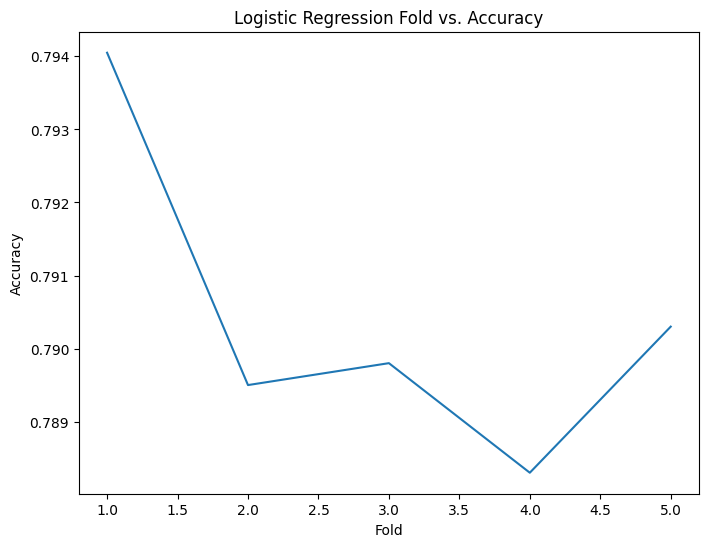

In [105]:
# test logistic regression model
test_model(LogisticRegression(random_state=42), "Logistic Regression")

Scores: [0.80735 0.80625 0.8092  0.80655 0.80945], Average Random Forest Accuracy: 0.808


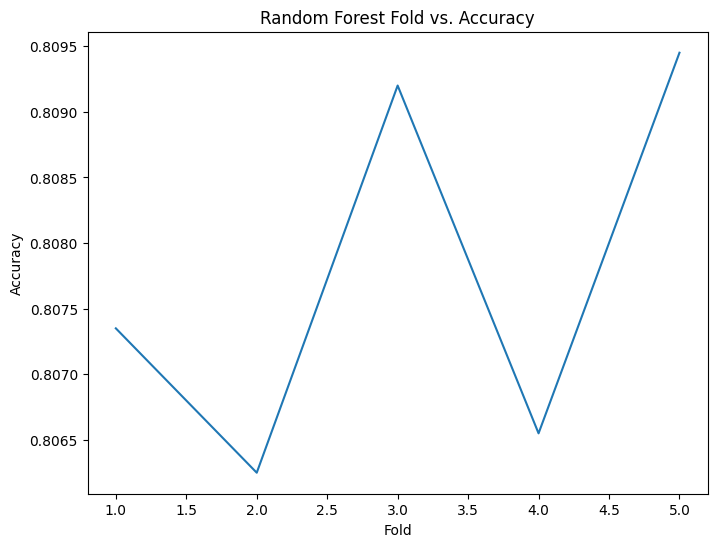

In [106]:
# test random forest model
test_model(RandomForestClassifier(random_state=42, n_jobs=-1), "Random Forest")

In [63]:
# train random forest model
model = RandomForestClassifier(random_state = 42, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [68]:
inputs = features_df[top_keys]
inputs = scaler.transform(inputs)

In [69]:
preds = model.predict(inputs)
actual = features_df["class"]

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [109]:
# evaluate random forest model
acc = accuracy_score(actual, preds)
f"Random Forest Validation Accuracy: {round(acc, 3)}"

'Random Forest Validation Accuracy: 0.72'

Performance is comparable to standards set by Ni et al 2017 & Wang et al 2018

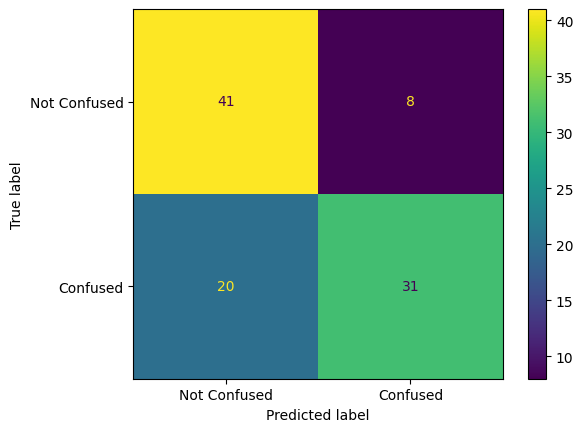

In [117]:
# confusion matrix
cm = confusion_matrix(actual, preds)
disp = ConfusionMatrixDisplay(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Confused", "Confused"])
cm_display.plot()

In [116]:
# classification report
print(classification_report(actual, preds, target_names=["Not Confused", "Confused"]))

              precision    recall  f1-score   support

Not Confused       0.67      0.84      0.75        49
    Confused       0.79      0.61      0.69        51

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100

